In [1]:
import os, sys

ruta_raiz = os.path.abspath("..")  # sube un nivel desde Analisis/
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [2]:
import gymnasium as gym
from NGU.DQN import DQN as NGU_DQN
from BasicDQN.DQN import DQN as BasicDQN
from stable_baselines3.common.monitor import Monitor
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [3]:
# Parámetros comunes
base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1_000_000,
    learning_starts = 1_000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 1_000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 0.1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 1,
)

# Copias con y sin NGU
# ngu_params = copy.deepcopy(base_params)
# ngu_params["enable_ngu"] = True
# ngu_params["beta_candidates"] = [0.3]

# basic_params = copy.deepcopy(base_params)

In [4]:
ITERACION_ACTUAL = 0
N_RUNS = 2
TOTAL_TIMESTEPS = 300_000

In [5]:
for run in range(ITERACION_ACTUAL, ITERACION_ACTUAL + N_RUNS):
    print(f"Ejecutando corrida {run + 1}/{ITERACION_ACTUAL + N_RUNS}")

    # Crear entorno y monitor con nombre único por corrida
    env_basic = Monitor(gym.make("MountainCar-v0"), filename=f"runs_final_0/monitor_basic_{run}")
    env_ngu = Monitor(gym.make("MountainCar-v0"), filename=f"runs_final_0/monitor_ngu_{run}")

    # Clonar parámetros
    ngu_params = copy.deepcopy(base_params)
    ngu_params["beta"] = 0

    basic_params = copy.deepcopy(base_params)

    agent_ngu = NGU_DQN(env_ngu, **ngu_params)
    agent_ngu.learn(total_timesteps=TOTAL_TIMESTEPS)

    # Entrenar agentes
    agent_basic = BasicDQN(env_basic, **basic_params)
    agent_basic.learn(total_timesteps=TOTAL_TIMESTEPS)

Ejecutando corrida 1/2
--------------------------------
| rollout/            |        |
|    ep_len_mean      | 127    |
|    ep_rew_mean      | -127   |
|    exploration_rate | 0.100  |
| time/               |        |
|    episodes         | 1000   | 
|    fps              | 285    |
|    time_elapsed     | 584    |
|    total_timesteps  | 166595 |
| train/              |        |
|    learning_rate    | 0.001  |
|    loss             | 0.2259 |
|    n_updates        | 41400  |
--------------------------------
--------------------------------
| rollout/            |        |
|    ep_len_mean      | 149    |
|    ep_rew_mean      | -149   |
|    exploration_rate | 0.100  |
| time/               |        |
|    episodes         | 1970   | 
|    fps              | 306    |
|    time_elapsed     | 979    |
|    total_timesteps  | 300000 |
| train/              |        |
|    learning_rate    | 0.001  |
|    loss             | 0.2644 |
|    n_updates        | 74752  |
------------------

C:\Users\juan_\AppData\Local\Temp\ipykernel_22836\671069884.py:23: RuntimeWarning: Mean of empty slice
  basic_mean = np.nanmean(basic_matrix, axis=0)


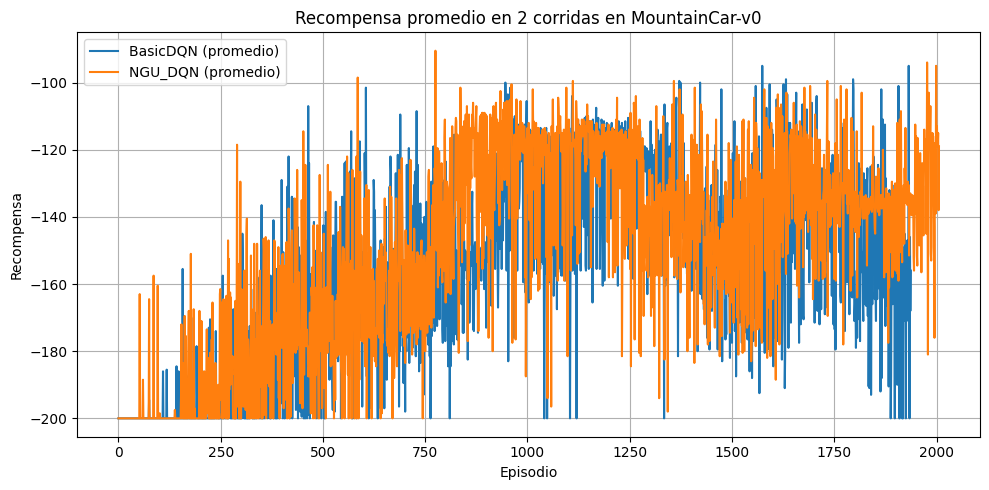

In [6]:
n_archivos = 2

basic_rewards = []
ngu_rewards = []

# Leer recompensas
for i in range(0, n_archivos):
    rb = pd.read_csv(f"runs_final_0/monitor_basic_{i}.monitor.csv", skiprows=1)["r"].values
    rn = pd.read_csv(f"runs_final_0/monitor_ngu_{i}.monitor.csv", skiprows=1)["r"].values

    basic_rewards.append(rb)
    ngu_rewards.append(rn)

max_len = max(max(len(r) for r in basic_rewards), max(len(r) for r in ngu_rewards))

def pad_to(arr, length):
    return np.pad(arr, (0, length - len(arr)), constant_values=np.nan)

basic_matrix = np.vstack([pad_to(r, max_len) for r in basic_rewards])
ngu_matrix   = np.vstack([pad_to(r, max_len) for r in ngu_rewards])

# Calcular promedios ignorando NaNs
basic_mean = np.nanmean(basic_matrix, axis=0)
ngu_mean = np.nanmean(ngu_matrix, axis=0)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(basic_mean, label="BasicDQN (promedio)")
plt.plot(ngu_mean, label="NGU_DQN (promedio)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.title(f"Recompensa promedio en {n_archivos} corridas en MountainCar-v0")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# # Entornos distintos (con monitores)
# env_ngu = Monitor(gym.make("MountainCar-v0"), filename="monitor_ngu")
# env_basic = Monitor(gym.make("MountainCar-v0"), filename="monitor_basic")

# # Agentes
# agent_ngu = DQN(env_ngu, **ngu_params)
# agent_basic = DQN(env_basic, **basic_params)


In [8]:
# agent_ngu.learn(total_timesteps=300_000, log_interval=300)

In [9]:
# agent_basic.learn(total_timesteps=300_000, log_interval=300)

In [10]:
# # Cargar datos desde los archivos monitor
# monitor_basic = pd.read_csv("monitor_basic.monitor.csv", skiprows=1)
# monitor_ngu = pd.read_csv("monitor_ngu.monitor.csv", skiprows=1)

# # Graficar recompensas
# plt.figure(figsize=(12, 5))
# plt.plot(monitor_basic["r"], label="BasicDQN")
# plt.plot(monitor_ngu["r"], label="NGU_DQN")
# plt.title("Recompensa por Episodio (desde Monitor)")
# plt.xlabel("Episodio")
# plt.ylabel("Recompensa")
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [11]:
# plt.figure(figsize=(12, 5))
# plt.plot(monitor_basic["l"], label="BasicDQN")
# plt.plot(monitor_ngu["l"], label="NGU_DQN")
# plt.title("Duración del Episodio (desde Monitor)")
# plt.xlabel("Episodio")
# plt.ylabel("Longitud")
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()